In [ ]:
!gdown 1TKbq9u99rvRjcsqvLwHUG_bf6a6xMOUR

Downloading...
From: https://drive.google.com/uc?id=1TKbq9u99rvRjcsqvLwHUG_bf6a6xMOUR
To: /content/MIMIC_IV.csv
100% 10.2M/10.2M [00:00<00:00, 34.5MB/s]


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import norm, t, ttest_ind, ttest_rel
import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f_oneway
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/MIMIC_IV.csv')
df

gender        age  heart_rate_min  heart_rate_max  heart_rate_mean  \
0          M  54.550390            93.0           115.0       103.500000   
1          M  86.324653            50.0            61.0        54.333333   
2          M  40.270146            70.0           105.0        83.434783   
3          M  73.383547            68.0            98.0        83.880000   
4          M  70.724748            77.0            95.0        85.771429   
...      ...        ...             ...             ...              ...   
36484      F  84.952721            59.0            80.0        68.538462   
36485      F  30.583263            59.0           104.0        79.954545   
36486      F  60.095765            71.0            94.0        82.625000   
36487      M  78.847051            63.0            86.0        72.836735   
36488      M  32.783457            86.0           103.0        94.000000   

       mbp_min  mbp_max    mbp_mean  sbp_min  sbp_max  ...  \
0         57.0    100.0   82.733333     87.0    163.0  ...   
1         61.0     93.0   71.695652     95.0    141.0  ...   
2         66.0     92.0   76.695652     94.0    129.0  ...   
3         74.0    101.0   84.694444     83.0    148.0  ...   
4         30.0     90.0   62.657143     52.0    129.0  ...   
...        ...      ...         ...      ...      ...  ...   
36484      2.0     95.0   74.346154    109.0    152.0  ...   
36485     67.0     91.0   77.820000     94.0    140.0  ...   
36486     51.0     92.0   61.772727     90.0    120.0  ...   
36487    113.0    121.0  117.000000    148.0    219.0  ...   
36488     83.0    118.0   99.916667     97.0    176.0  ...   

       bilirubin_indirect_min  urineoutput  sofa_respiration  \
0                         NaN       3459.0               2.0   
1                         NaN       2020.0               NaN   
2                         NaN       3050.0               NaN   
3                         NaN       1592.0               NaN   
4                         NaN        339.0               2.0   
...                       ...          ...               ...   
36484                     NaN        697.0               NaN   
36485                     NaN       2000.0               NaN   
36486                     NaN       3500.0               NaN   
36487                     NaN       1900.0               NaN   
36488                     NaN          NaN               NaN   

       sofa_coagulation  sofa_liver  sofa_cardiovascular  sofa_cns  \
0                   0.0         NaN                  1.0       0.0   
1                   1.0         NaN                  1.0       1.0   
2                   1.0         0.0                  1.0       1.0   
3                   0.0         NaN                  0.0       0.0   
4                   0.0         0.0                  4.0       1.0   
...                 ...         ...                  ...       ...   
36484               0.0         0.0                  1.0       4.0   
36485               0.0         NaN                  1.0       1.0   
36486               0.0         NaN                  1.0       0.0   
36487               0.0         NaN                  0.0       1.0   
36488               0.0         0.0                  0.0       1.0   

       sofa_renal  charlson_comorbidity_index  outcome  
0             1.0                           3    False  
1             1.0                           8    False  
2             0.0                           4    False  
3             1.0                           6    False  
4             3.0                          10    False  
...           ...                         ...      ...  
36484         1.0                          10    False  
36485         0.0                           0    False  
36486         0.0                           3    False  
36487         0.0                           5    False  
36488         4.0                           5    False  

[36489 rows x 60 columns]

In [ ]:
category_counts = df['outcome'].value_counts()

print(category_counts)

outcome
False    35160
True      1329
Name: count, dtype: int64


In [ ]:
missing_data_percentage = df.isnull().mean() * 100
columns_with_missing_data = missing_data_percentage[missing_data_percentage > 0]
print("Percentage of Missing Data by Column:")
print(columns_with_missing_data)

Percentage of Missing Data by Column:
heart_rate_min             0.197320
heart_rate_max             0.197320
heart_rate_mean            0.197320
mbp_min                    0.241169
mbp_max                    0.241169
mbp_mean                   0.241169
sbp_min                    0.400121
sbp_max                    0.400121
sbp_mean                   0.400121
dbp_min                    0.405602
dbp_max                    0.405602
dbp_mean                   0.405602
temperature_min            0.994820
temperature_max            0.994820
temperature_mean           0.994820
lactate_min               56.343007
lactate_max               56.343007
ph_min                    48.313190
ph_max                    48.313190
chloride_min              83.203157
chloride_max              83.203157
calcium_min               74.543013
calcium_max               74.543013
sodium_min                82.038423
sodium_max                82.038423
glucose_min                0.816684
glucose_max               

In [ ]:
threshold = 0.50
df = df.loc[:, df.isnull().mean() <= threshold]

In [ ]:
missing_data_percentage = df.isnull().mean() * 100
columns_with_missing_data = missing_data_percentage[missing_data_percentage > 0]
print("Percentage of Missing Data by Column:")
print(columns_with_missing_data)

Percentage of Missing Data by Column:
heart_rate_min          0.197320
heart_rate_max          0.197320
heart_rate_mean         0.197320
mbp_min                 0.241169
mbp_max                 0.241169
mbp_mean                0.241169
sbp_min                 0.400121
sbp_max                 0.400121
sbp_mean                0.400121
dbp_min                 0.405602
dbp_max                 0.405602
dbp_mean                0.405602
temperature_min         0.994820
temperature_max         0.994820
temperature_mean        0.994820
ph_min                 48.313190
ph_max                 48.313190
glucose_min             0.816684
glucose_max             0.816684
wbc_min                 0.696100
wbc_max                 0.696100
creatinine_min          0.542629
creatinine_max          0.542629
hemoglobin_min          0.704322
hemoglobin_max          0.704322
pt_min                 11.356847
pt_max                 11.356847
alt_max                48.853079
alt_min                48.853079
alp_m

In [ ]:
print(df.shape)

(36489, 45)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'Category' column
df['outcome'] = label_encoder.fit_transform(df['outcome'])
df['gender'] = label_encoder.fit_transform(df['gender'])


# Show the mapping of categories to encoded values
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category Mapping:")
print(category_mapping)

Category Mapping:
{'F': np.int64(0), 'M': np.int64(1)}


<ipython-input-9-762c2263b554>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outcome'] = label_encoder.fit_transform(df['outcome'])
<ipython-input-9-762c2263b554>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = label_encoder.fit_transform(df['gender'])


# Handle Missing Value

In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Apply MICE imputation
imputer = IterativeImputer(random_state=42)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
missing_data_percentage = df.isnull().mean() * 100
columns_with_missing_data = missing_data_percentage[missing_data_percentage > 0]
print("Percentage of Missing Data by Column:")
print(columns_with_missing_data)

Percentage of Missing Data by Column:
Series([], dtype: float64)


In [ ]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df

gender        age  heart_rate_min  heart_rate_max  heart_rate_mean  \
0         1.0  54.550390            93.0           115.0       103.500000   
1         1.0  86.324653            50.0            61.0        54.333333   
2         1.0  40.270146            70.0           105.0        83.434783   
3         1.0  73.383547            68.0            98.0        83.880000   
4         1.0  70.724748            77.0            95.0        85.771429   
...       ...        ...             ...             ...              ...   
36484     0.0  84.952721            59.0            80.0        68.538462   
36485     0.0  30.583263            59.0           104.0        79.954545   
36486     0.0  60.095765            71.0            94.0        82.625000   
36487     1.0  78.847051            63.0            86.0        72.836735   
36488     1.0  32.783457            86.0           103.0        94.000000   

       mbp_min  mbp_max    mbp_mean  sbp_min  sbp_max  ...  \
0         57.0    100.0   82.733333     87.0    163.0  ...   
1         61.0     93.0   71.695652     95.0    141.0  ...   
2         66.0     92.0   76.695652     94.0    129.0  ...   
3         74.0    101.0   84.694444     83.0    148.0  ...   
4         30.0     90.0   62.657143     52.0    129.0  ...   
...        ...      ...         ...      ...      ...  ...   
36484      2.0     95.0   74.346154    109.0    152.0  ...   
36485     67.0     91.0   77.820000     94.0    140.0  ...   
36486     51.0     92.0   61.772727     90.0    120.0  ...   
36487    113.0    121.0  117.000000    148.0    219.0  ...   
36488     83.0    118.0   99.916667     97.0    176.0  ...   

       bilirubin_total_max  bilirubin_total_min  urineoutput  \
0                 1.512977             1.344871  3459.000000   
1                 1.534579             1.355130  2020.000000   
2                 1.100000             1.100000  3050.000000   
3                 1.530260             1.385403  1592.000000   
4                 0.900000             0.800000   339.000000   
...                    ...                  ...          ...   
36484             0.600000             0.500000   697.000000   
36485             1.675593             1.574228  2000.000000   
36486             1.960452             1.508232  3500.000000   
36487             1.557587             1.326441  1900.000000   
36488             0.400000             0.400000  3406.551846   

       sofa_coagulation  sofa_liver  sofa_cardiovascular  sofa_cns  \
0                   0.0    0.374135                  1.0       0.0   
1                   1.0    0.428096                  1.0       1.0   
2                   1.0    0.000000                  1.0       1.0   
3                   0.0    0.251198                  0.0       0.0   
4                   0.0    0.000000                  4.0       1.0   
...                 ...         ...                  ...       ...   
36484               0.0    0.000000                  1.0       4.0   
36485               0.0    0.350286                  1.0       1.0   
36486               0.0    0.429359                  1.0       0.0   
36487               0.0    0.327012                  0.0       1.0   
36488               0.0    0.000000                  0.0       1.0   

       sofa_renal  charlson_comorbidity_index  outcome  
0             1.0                         3.0      0.0  
1             1.0                         8.0      0.0  
2             0.0                         4.0      0.0  
3             1.0                         6.0      0.0  
4             3.0                        10.0      0.0  
...           ...                         ...      ...  
36484         1.0                        10.0      0.0  
36485         0.0                         0.0      0.0  
36486         0.0                         3.0      0.0  
36487         0.0                         5.0      0.0  
36488         4.0                         5.0      0.0  

[36489 rows x 45 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      36489 non-null  float64
 1   age                         36489 non-null  float64
 2   heart_rate_min              36489 non-null  float64
 3   heart_rate_max              36489 non-null  float64
 4   heart_rate_mean             36489 non-null  float64
 5   mbp_min                     36489 non-null  float64
 6   mbp_max                     36489 non-null  float64
 7   mbp_mean                    36489 non-null  float64
 8   sbp_min                     36489 non-null  float64
 9   sbp_max                     36489 non-null  float64
 10  sbp_mean                    36489 non-null  float64
 11  dbp_min                     36489 non-null  float64
 12  dbp_max                     36489 non-null  float64
 13  dbp_mean                    364

In [ ]:
import pandas as pd


numeric_df = df.select_dtypes(include=['number'])

min_values = numeric_df.min()
max_values = numeric_df.max()
range_values = max_values - min_values


print("Minimum values:\n", min_values)
print("\nMaximum values:\n", max_values)
print("\nRange values:\n", range_values)


Minimum values:
 gender                            0.000000
age                              18.002527
heart_rate_min                    9.000000
heart_rate_max                   36.000000
heart_rate_mean                  28.500000
mbp_min                           0.830000
mbp_max                          51.000000
mbp_mean                         42.513889
sbp_min                           2.000000
sbp_max                          49.000000
sbp_mean                         40.000000
dbp_min                           1.000000
dbp_max                          29.000000
dbp_mean                         29.000000
temperature_min                  22.000000
temperature_max                  33.400000
temperature_mean                 33.191304
ph_min                            6.700000
ph_max                            6.810000
glucose_min                       7.000000
glucose_max                       7.000000
wbc_min                           0.100000
wbc_max                           0.1

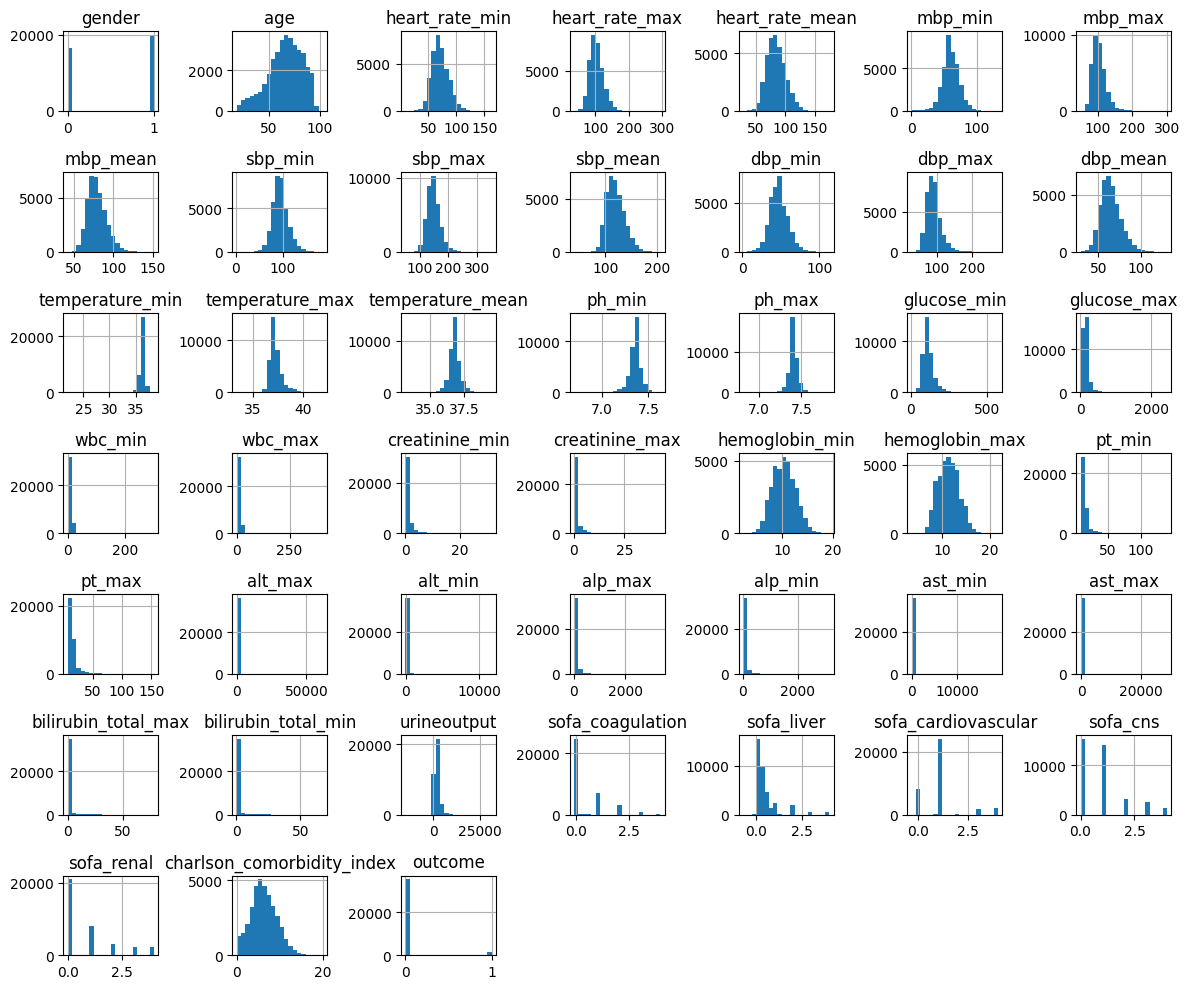

In [ ]:
# Distribution of numerical features
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


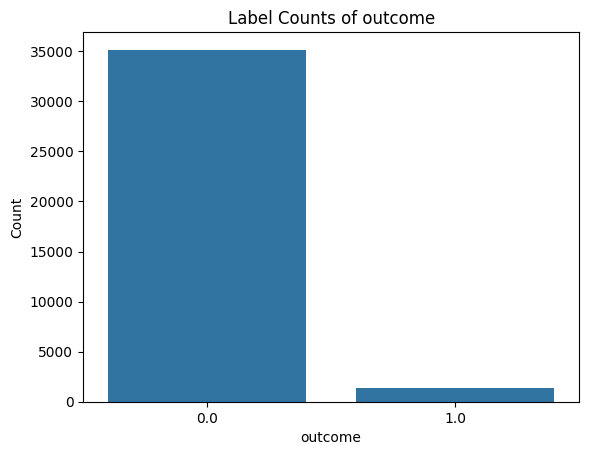

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='outcome', data=df)
plt.title('Label Counts of outcome')
plt.xlabel('outcome')
plt.ylabel('Count')
plt.show()

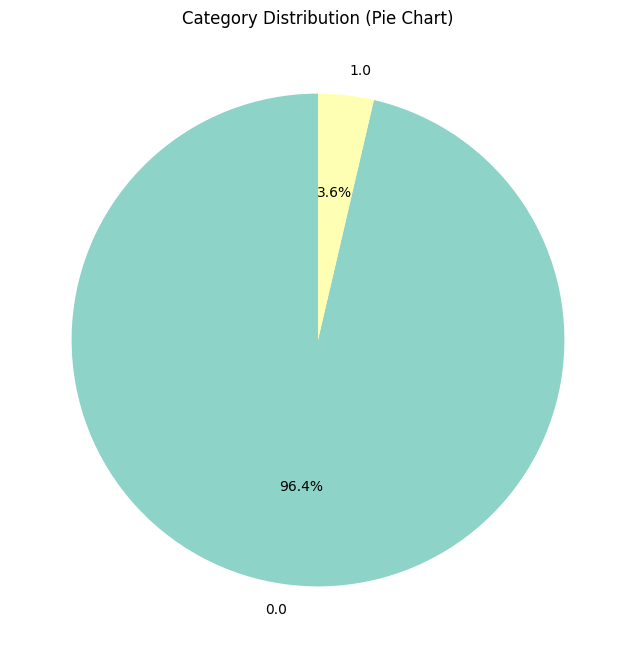

In [ ]:
category_counts = df['outcome'].value_counts()


plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(category_counts)))
plt.title('Category Distribution (Pie Chart)')
plt.ylabel('')
plt.show()

In [ ]:
"""
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


X = df.drop('outcome', axis=1)
y = df['outcome']


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

 """

"\nfrom sklearn.ensemble import RandomForestClassifier\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n\nX = df.drop('outcome', axis=1)\ny = df['outcome']\n\n\nrf = RandomForestClassifier(n_estimators=100, random_state=42)\nrf.fit(X, y)\n\n\nfeature_importances = rf.feature_importances_\n\n# Create a DataFrame for better visualization\nfeature_importance_df = pd.DataFrame({\n    'Feature': X.columns,\n    'Importance': feature_importances\n})\n\n# Sort the DataFrame by importance\nfeature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)\n\n# Plotting the feature importance\nplt.figure(figsize=(10, 6))\nsns.barplot(x='Importance', y='Feature', data=feature_importance_df)\nplt.title('Feature Importance from Random Forest')\nplt.show()\n\n "

In [ ]:
# Skewness and Kurtosis
skewness = df.skew()
kurtosis = df.kurt()
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)


Skewness:
 gender                        -0.180019
age                           -0.527688
heart_rate_min                 0.420465
heart_rate_max                 0.709923
heart_rate_mean                0.393968
mbp_min                       -0.228730
mbp_max                        2.589753
mbp_mean                       0.613422
sbp_min                        0.337314
sbp_max                        0.667159
sbp_mean                       0.576983
dbp_min                        0.266854
dbp_max                        1.136559
dbp_mean                       0.555898
temperature_min               -4.161806
temperature_max                1.444944
temperature_mean               0.231762
ph_min                        -1.447308
ph_max                        -0.473554
glucose_min                    2.067353
glucose_max                    5.203587
wbc_min                       12.431579
wbc_max                       14.091047
creatinine_min                 4.816938
creatinine_max               

In [ ]:
duplicates = df.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicate rows in place
df.drop_duplicates(inplace=True)

# Verify if duplicates were removed
print(f"Shape of DataFrame after removing duplicates: {df.shape}")

Number of duplicate rows: 0
Shape of DataFrame after removing duplicates: (36489, 45)


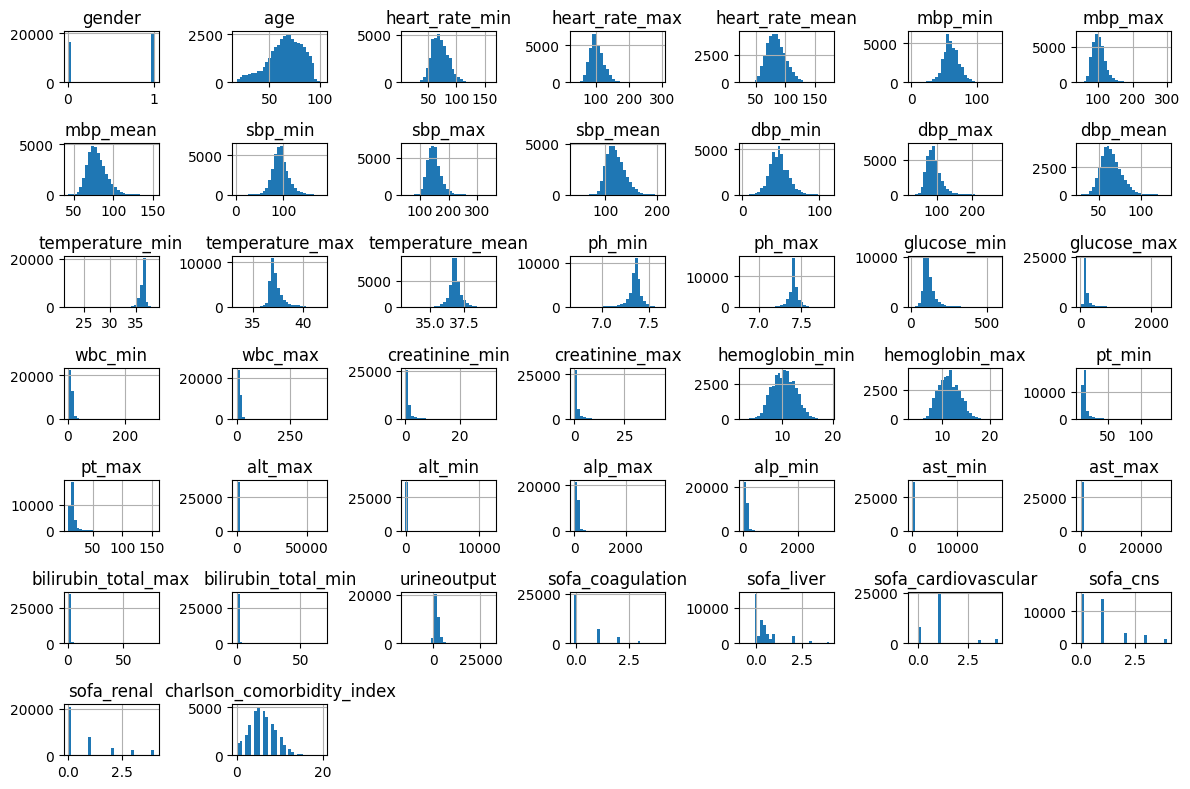

In [ ]:
import matplotlib.pyplot as plt

df.drop(columns=['outcome'], errors='ignore').hist(figsize=(12, 8), bins=30)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

def cap_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count total outliers
    outlier_mask = (df < lower_bound) | (df > upper_bound)
    total_outliers = outlier_mask.sum().sum()
    print(f"🔍 Total outliers detected: {total_outliers}")

    df_capped = df.copy()

    if total_outliers < 3000:
        print("✅ Capping outliers because count is below 3000")
        for col in df.columns:
            df_capped[col] = np.where(df[col] < lower_bound[col], lower_bound[col],
                               np.where(df[col] > upper_bound[col], upper_bound[col], df[col]))
    else:

        df_capped = df[~outlier_mask.any(axis=1)].copy()

    return df_capped

df_features_only = df.drop(columns=['outcome'], errors='ignore')

# Apply outlier handling
df_capped = cap_outliers_iqr(df_features_only)


if 'outcome' in df.columns:
    if df_capped.shape[0] == df.shape[0]:
        df_capped['outcome'] = df['outcome'].values
    else:
        df_capped['outcome'] = df.loc[df_capped.index, 'outcome']

# Preview final dataset
print("✅ Final capped dataset preview:")
print(df_capped.head())


🔍 Total outliers detected: 87280
✅ Final capped dataset preview:
    gender        age  heart_rate_min  heart_rate_max  heart_rate_mean  \
0      1.0  54.550390            93.0           115.0       103.500000   
2      1.0  40.270146            70.0           105.0        83.434783   
6      1.0  68.308897            60.0            80.0        71.083333   
8      1.0  62.564975            48.0            87.0        59.000000   
10     1.0  40.102130            79.0            90.0        84.555556   

    mbp_min  mbp_max   mbp_mean  sbp_min  sbp_max  ...  bilirubin_total_max  \
0      57.0    100.0  82.733333     87.0    163.0  ...             1.512977   
2      66.0     92.0  76.695652     94.0    129.0  ...             1.100000   
6      63.0    112.0  75.720000     87.0    153.0  ...             1.962295   
8      56.0     86.0  71.954545    104.0    140.0  ...             1.758533   
10     59.0    106.0  76.285714     84.0    136.0  ...             1.970717   

    bilirubin_t

In [ ]:
df_capped

gender        age  heart_rate_min  heart_rate_max  heart_rate_mean  \
0         1.0  54.550390            93.0           115.0       103.500000   
2         1.0  40.270146            70.0           105.0        83.434783   
6         1.0  68.308897            60.0            80.0        71.083333   
8         1.0  62.564975            48.0            87.0        59.000000   
10        1.0  40.102130            79.0            90.0        84.555556   
...       ...        ...             ...             ...              ...   
36479     0.0  91.150207            94.0           123.0       104.269231   
36480     1.0  79.812543            57.0            87.0        70.375000   
36482     1.0  73.104837            60.0            62.0        60.080000   
36483     1.0  73.196221            70.0            73.0        70.600000   
36485     0.0  30.583263            59.0           104.0        79.954545   

       mbp_min  mbp_max   mbp_mean  sbp_min  sbp_max  ...  \
0         57.0    100.0  82.733333     87.0    163.0  ...   
2         66.0     92.0  76.695652     94.0    129.0  ...   
6         63.0    112.0  75.720000     87.0    153.0  ...   
8         56.0     86.0  71.954545    104.0    140.0  ...   
10        59.0    106.0  76.285714     84.0    136.0  ...   
...        ...      ...        ...      ...      ...  ...   
36479     65.0    105.0  82.166667     84.0    130.0  ...   
36480     67.0    121.0  94.071429    108.0    182.0  ...   
36482     47.0     95.0  68.852941     58.0    137.0  ...   
36483     42.0    125.0  70.916667     85.0    133.0  ...   
36485     67.0     91.0  77.820000     94.0    140.0  ...   

       bilirubin_total_max  bilirubin_total_min  urineoutput  \
0                 1.512977             1.344871       3459.0   
2                 1.100000             1.100000       3050.0   
6                 1.962295             1.546220       2560.0   
8                 1.758533             1.609553        800.0   
10                1.970717             1.564893       3085.0   
...                    ...                  ...          ...   
36479             0.400000             0.400000       2425.0   
36480             1.495265             1.310211        800.0   
36482             1.560822             1.521011       1808.0   
36483             1.507520             1.467128       1555.0   
36485             1.675593             1.574228       2000.0   

       sofa_coagulation  sofa_liver  sofa_cardiovascular  sofa_cns  \
0                   0.0    0.374135                  1.0       0.0   
2                   1.0    0.000000                  1.0       1.0   
6                   1.0    0.719427                  1.0       1.0   
8                   1.0    0.609350                  1.0       0.0   
10                  0.0    0.578287                  1.0       2.0   
...                 ...         ...                  ...       ...   
36479               0.0    0.000000                  1.0       0.0   
36480               0.0    0.292212                  1.0       2.0   
36482               0.0    0.404222                  1.0       1.0   
36483               0.0    0.397053                  1.0       1.0   
36485               0.0    0.350286                  1.0       1.0   

       sofa_renal  charlson_comorbidity_index  outcome  
0             1.0                         3.0      0.0  
2             0.0                         4.0      0.0  
6             0.0                         3.0      0.0  
8             0.0                         4.0      0.0  
10            0.0                         1.0      0.0  
...           ...                         ...      ...  
36479         1.0                        10.0      0.0  
36480         1.0                         8.0      0.0  
36482         1.0                        10.0      0.0  
36483         0.0                         5.0      0.0  
36485         0.0                         0.0      0.0  

[8909 rows x 45 columns]

In [ ]:
from scipy.stats import f_oneway

X = df_capped .drop(columns=['outcome'])
y = df_capped ['outcome']

anova_results = {}
alpha = 0.10

for col in X.select_dtypes(include=['float64', 'int64']).columns:
    groups = [X[y == category][col] for category in y.unique()]
    f_stat, p_value = f_oneway(*groups)
    anova_results[col] = {'f_stat': f_stat, 'p-value': p_value, 'significant': p_value < alpha}

anova_df = pd.DataFrame.from_dict(anova_results, orient='index')
print(anova_df)


                               f_stat       p-value  significant
gender                       0.123504  7.252732e-01        False
age                          0.500705  4.792092e-01        False
heart_rate_min               2.476514  1.155937e-01        False
heart_rate_max               0.949080  3.299800e-01        False
heart_rate_mean              0.890791  3.452887e-01        False
mbp_min                      0.001510  9.690046e-01        False
mbp_max                      2.944026  8.623041e-02         True
mbp_mean                     0.939167  3.325186e-01        False
sbp_min                      0.484566  4.863795e-01        False
sbp_max                      3.805050  5.112957e-02         True
sbp_mean                     0.171688  6.786261e-01        False
dbp_min                      0.602354  4.377020e-01        False
dbp_max                      1.916867  1.662371e-01        False
dbp_mean                     0.892383  3.448580e-01        False
temperature_min          

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
significant_columns = anova_df[anova_df['significant']].index

if 'outcome' not in significant_columns:

    significant_columns = significant_columns.tolist() + ['outcome']


significant_columns = pd.Index(significant_columns)


df_capped = df_capped[[col for col in significant_columns if col in df_capped.columns]]

In [ ]:
df_capped

mbp_max  sbp_max  glucose_max  hemoglobin_max     alt_max     alt_min  \
0        100.0    163.0        122.0             8.9   91.507353   69.233290   
2         92.0    129.0        115.0             7.1   35.000000   35.000000   
6        112.0    153.0        139.0            12.7   91.818706   66.763168   
8         86.0    140.0         99.0            13.2  125.850192   83.265562   
10       106.0    136.0        100.0            12.2  184.088317  120.136210   
...        ...      ...          ...             ...         ...         ...   
36479    105.0    130.0        146.0            11.3   19.000000   19.000000   
36480    121.0    182.0        178.0            15.7   10.000000   10.000000   
36482     95.0    137.0        141.0            10.5   61.757119   66.938846   
36483    125.0    133.0         97.0            12.5   89.546139   77.304184   
36485     91.0    140.0        188.0            11.5  180.103206  122.521747   

          alp_max     alp_min     ast_min     ast_max  urineoutput  sofa_cns  \
0      115.064469  112.220023   89.129889  142.273873       3459.0       0.0   
2       57.000000   57.000000   54.000000   54.000000       3050.0       1.0   
6      120.592496  102.121278   74.212415   99.659756       2560.0       1.0   
8      113.113408  107.568910   80.373282  121.119026        800.0       0.0   
10     121.699531  105.417875  130.781158  228.983391       3085.0       2.0   
...           ...         ...         ...         ...          ...       ...   
36479   57.000000   57.000000   39.000000   39.000000       2425.0       0.0   
36480  114.589999  105.378596   14.000000   14.000000        800.0       2.0   
36482  122.989979  120.966587   89.101484   99.225542       1808.0       1.0   
36483  117.183312  115.575056   99.198671  127.497916       1555.0       1.0   
36485  105.566912  103.844376  116.305819  186.893343       2000.0       1.0   

       charlson_comorbidity_index  outcome  
0                             3.0      0.0  
2                             4.0      0.0  
6                             3.0      0.0  
8                             4.0      0.0  
10                            1.0      0.0  
...                           ...      ...  
36479                        10.0      0.0  
36480                         8.0      0.0  
36482                        10.0      0.0  
36483                         5.0      0.0  
36485                         0.0      0.0  

[8909 rows x 14 columns]

In [ ]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(df_capped, test_size=0.20, random_state=42)

# Display the split dataframes
print("Training DataFrame shape:", train_df.shape)
print("Testing DataFrame shape:", test_df.shape)

Training DataFrame shape: (7127, 14)
Testing DataFrame shape: (1782, 14)


In [ ]:
# Check value counts of 'Category' in both train_df and test_df
train_category_counts = train_df['outcome'].value_counts()
test_category_counts = test_df['outcome'].value_counts()

# Display the results
print("Category distribution in training set:")
print(train_category_counts)

print("\nCategory distribution in testing set:")
print(test_category_counts)

Category distribution in training set:
outcome
0.0    6995
1.0     132
Name: count, dtype: int64

Category distribution in testing set:
outcome
0.0    1751
1.0      31
Name: count, dtype: int64


Optimal number of features: 3
Selected features: ['alp_max', 'ast_min', 'urineoutput']

Feature Count vs Mean CV Score:
 Number of Selected Features  Mean CV Score
                           1       0.971516
                           2       0.979234
                           3       0.981479
                           4       0.981479
                           5       0.981479
                           6       0.981479
                           7       0.981479
                           8       0.981479
                           9       0.981479
                          10       0.981479
                          11       0.981479
                          12       0.981479
                          13       0.981479


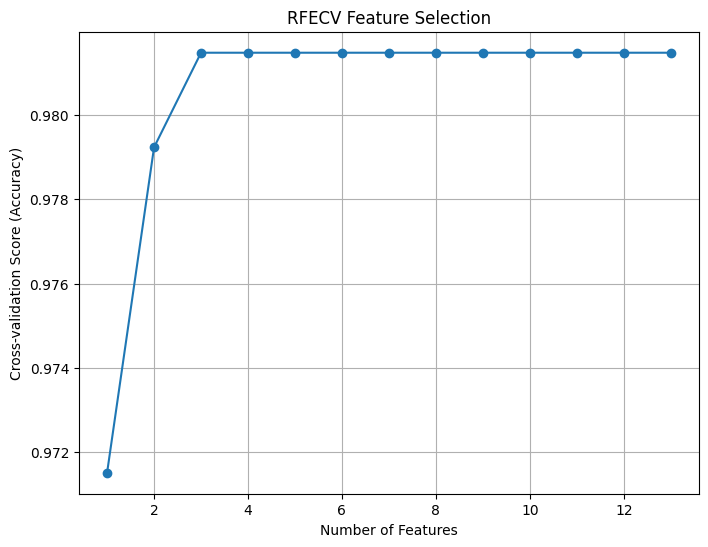

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


X_train = train_df.drop(columns=['outcome'])
y_train = train_df['outcome']


clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize StratifiedKFold cross-validation with 5 folds
cv = StratifiedKFold(n_splits=5)

# Perform RFECV for feature selection
selector = RFECV(estimator=clf, step=1, cv=cv, scoring='accuracy')
selector = selector.fit(X_train, y_train)

# Get the optimal number of features and selected features
optimal_num_features = selector.n_features_
selected_features = X_train.columns[selector.support_]

# Print the results
print(f"Optimal number of features: {optimal_num_features}")
print(f"Selected features: {selected_features.tolist()}")

# Create a DataFrame for feature count vs mean CV score
feature_cv_scores = pd.DataFrame({
    "Number of Selected Features": range(1, len(selector.cv_results_['mean_test_score']) + 1),
    "Mean CV Score": selector.cv_results_['mean_test_score']
})

# Print feature count vs mean CV score
print("\nFeature Count vs Mean CV Score:")
print(feature_cv_scores.to_string(index=False))

# Plot the RFECV performance curve
plt.figure(figsize=(8, 6))
plt.plot(feature_cv_scores["Number of Selected Features"],
         feature_cv_scores["Mean CV Score"], marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Cross-validation Score (Accuracy)")
plt.title("RFECV Feature Selection")
plt.grid(True)
plt.show()

In [ ]:
"""selected_features = [
    'heart_rate_max', 'heart_rate_mean', 'sbp_max', 'sbp_mean', 'dbp_mean',
    'temperature_mean', 'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max',
    'hemoglobin_min', 'hemoglobin_max', 'alp_max', 'alp_min', 'ast_min',
    'ast_max', 'bilirubin_total_min', 'urineoutput'
] """

"selected_features = [\n    'heart_rate_max', 'heart_rate_mean', 'sbp_max', 'sbp_mean', 'dbp_mean',\n    'temperature_mean', 'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max',\n    'hemoglobin_min', 'hemoglobin_max', 'alp_max', 'alp_min', 'ast_min',\n    'ast_max', 'bilirubin_total_min', 'urineoutput'\n] "

In [ ]:
from collections import Counter
# Define X and y
X_train = train_df.drop(columns=['outcome'])
y_train = train_df['outcome']

# Print original class distribution
print("Original training set class distribution:", Counter(y_train))

Original training set class distribution: Counter({0.0: 6995, 1.0: 132})


In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define feature matrix (X) and target (y)
X_train = train_df.drop(columns=['outcome'])
y_train = train_df['outcome']

# Initialize SMOTE for multi-class balancing
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Convert back to DataFrame
train_df_balanced = pd.DataFrame(X_resampled, columns=X_train.columns)
train_df_balanced['outcome'] = y_resampled

# Check class distribution
print("Class distribution after SMOTE:")
print(Counter(y_resampled))


Class distribution after SMOTE:
Counter({0.0: 6995, 1.0: 6995})


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()


numeric_cols = train_df_balanced.drop(columns=['outcome']).columns

# Fit scaler on training data and transform both train and test sets
train_df_balanced[numeric_cols] = scaler.fit_transform(train_df_balanced[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

# Display first few rows to verify standardization
print("Standardized Train Data:\n", train_df_balanced.head())
print("Standardized Test Data:\n", test_df.head())

Standardized Train Data:
     mbp_max   sbp_max  glucose_max  hemoglobin_max   alt_max   alt_min  \
0 -0.309887 -0.280334    -0.800169       -1.710624 -1.084918 -1.325997   
1  1.914318  0.358393     1.597681        0.774621  0.779603  0.831880   
2 -0.013326 -0.280334    -0.951931        1.603036  1.545953  1.515528   
3 -1.347849 -1.209392    -0.314528       -1.710624 -0.921578 -0.641383   
4 -1.199569 -0.512599     0.140759        0.222345 -0.773910 -0.622130   

    alp_max   alp_min   ast_min   ast_max  urineoutput  sofa_cns  \
0 -1.071863 -0.938865 -1.502185 -1.095203    -0.338241  0.388508   
1  0.286206  0.356287  0.409316  0.255062     0.008556 -1.182560   
2  0.250655  0.314229  0.733056  0.659557     1.771930 -1.182560   
3  1.035235  1.253769 -0.163305 -0.786774    -0.267706  0.388508   
4 -0.339141 -0.129741 -0.907953 -0.785548    -0.814352  0.388508   

   charlson_comorbidity_index  outcome  
0                    0.482848      0.0  
1                   -0.721172      0.0

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 30.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [ ]:
import time
import psutil
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Select only the specified features for training


features = significant_columns

X_balanced = train_df_balanced[features]
y_balanced = train_df_balanced['outcome']

# Define the classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,), max_iter=1000, alpha=0.001, solver='adam', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=10, early_stopping_rounds=50, random_state=42, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, alpha=0.01, gamma=0, random_state=42)
}

# Train classifiers and evaluate on the balanced dataset (training report only)
for clf_name, clf in classifiers.items():
    print(f"\nTraining {clf_name}...")

    # Get initial memory usage
    initial_memory = psutil.Process().memory_info().rss / (1024 * 1024)  # In MB

    # Record the start time for training
    start_time = time.time()

    clf.fit(X_balanced, y_balanced)

    # Record the end time and calculate the training time
    end_time = time.time()
    training_time = end_time - start_time

    # Predict on training set
    start_inference_time = time.time()
    y_train_pred = clf.predict(X_balanced)
    end_inference_time = time.time()
    inference_time = end_inference_time - start_inference_time

    # Get final memory usage
    final_memory = psutil.Process().memory_info().rss / (1024 * 1024)  # In MB
    memory_usage = final_memory - initial_memory

    # Print model parameters
    print(f"\n{clf_name} Model Parameters: {clf.get_params()}")

    print(f"\n{clf_name} Training Classification Report:")
    print(classification_report(y_balanced, y_train_pred, digits=4))

    # Print training time, memory usage, and inference time
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Memory Usage: {memory_usage:.4f} MB")
    print(f"Inference Time: {inference_time:.4f} seconds")



Training Random Forest...

Random Forest Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Random Forest Training Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      6995
         1.0     1.0000    1.0000    1.0000      6995

    accuracy                         1.0000     13990
   macro avg     1.0000    1.0000    1.0000     13990
weighted avg     1.0000    1.0000    1.0000     13990

Training Time: 2.7673 seconds
Memory Usage: 0.0000 MB
Inference Time: 0.2412 seconds

Training Decision Tree...

Decision Tree Model Parameters: {'ccp_alp


Training Random Forest...
5-Fold Cross-Validation Accuracy for Random Forest: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0000
Standard Deviation of CV Accuracy: 0.0000
Training Time: 13.6536 seconds


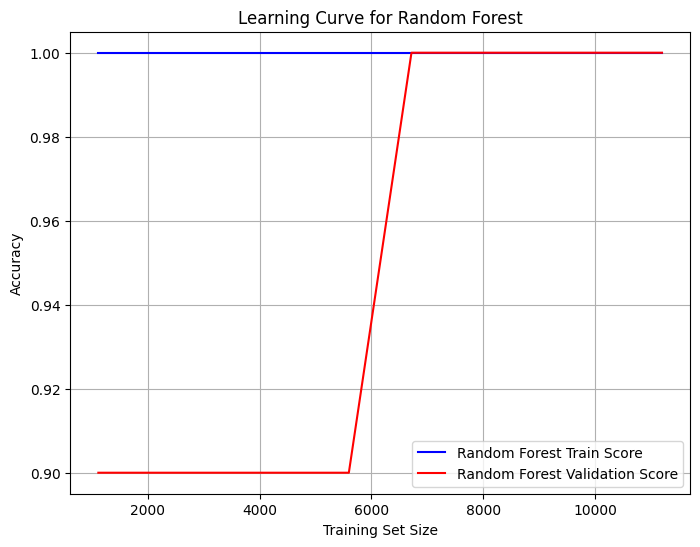


Training Decision Tree...
5-Fold Cross-Validation Accuracy for Decision Tree: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0000
Standard Deviation of CV Accuracy: 0.0000
Training Time: 0.2215 seconds


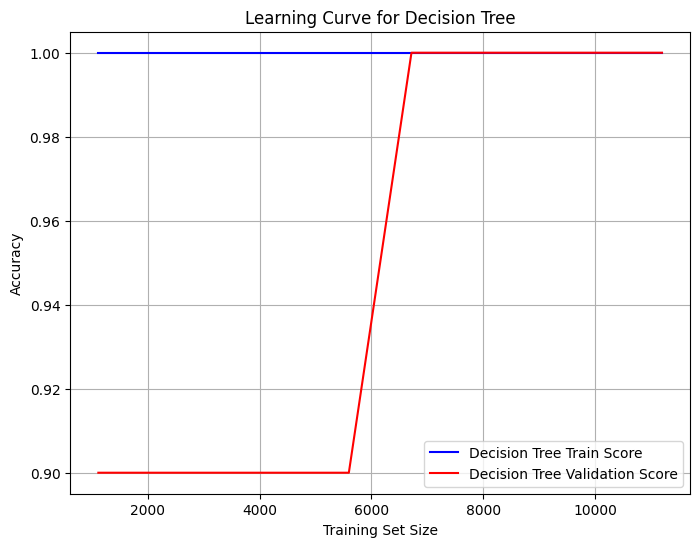


Training Extra Trees...
5-Fold Cross-Validation Accuracy for Extra Trees: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0000
Standard Deviation of CV Accuracy: 0.0000
Training Time: 1.5982 seconds


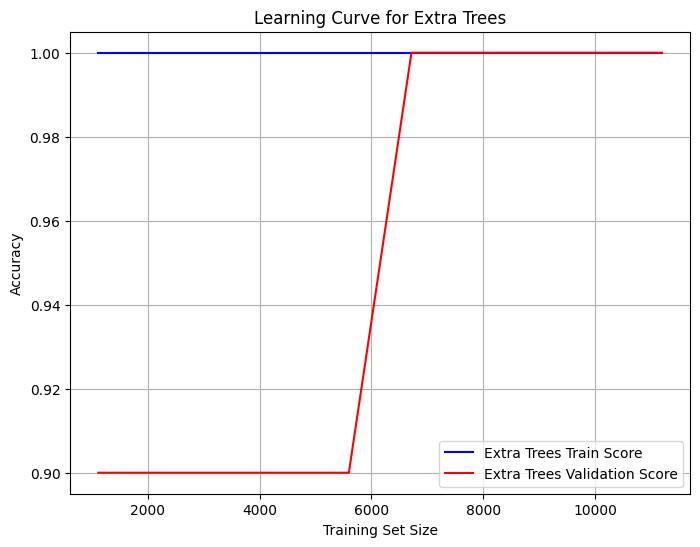


Training KNN...
5-Fold Cross-Validation Accuracy for KNN: [0.97855611 0.97212294 0.97927091 0.97569693 0.97605432]
Mean CV Accuracy: 0.9763
Standard Deviation of CV Accuracy: 0.0025
Training Time: 2.1417 seconds


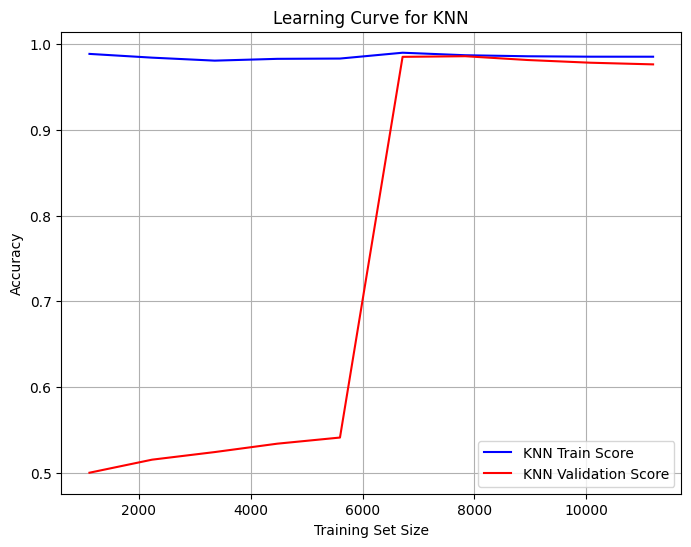


Training MLP...
5-Fold Cross-Validation Accuracy for MLP: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0000
Standard Deviation of CV Accuracy: 0.0000
Training Time: 9.6959 seconds


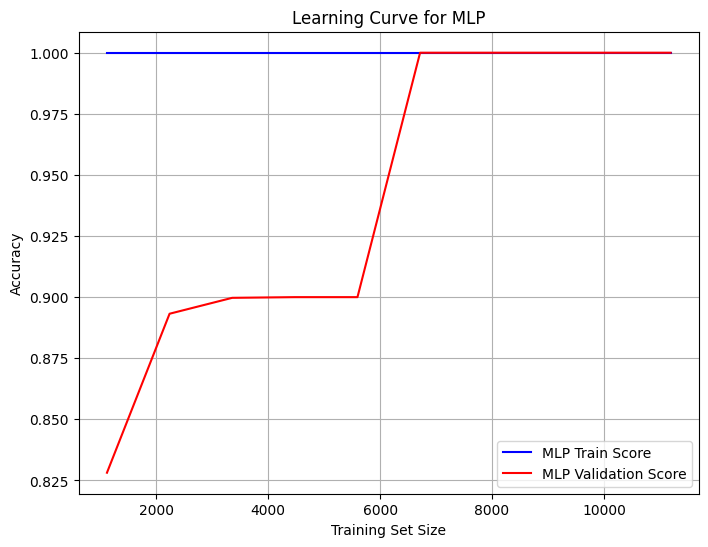


Training CatBoost...
5-Fold Cross-Validation Accuracy for CatBoost: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0000
Standard Deviation of CV Accuracy: 0.0000
Training Time: 20.4155 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.11/dist-packages/catboost/core.py", line 2410, in _fit


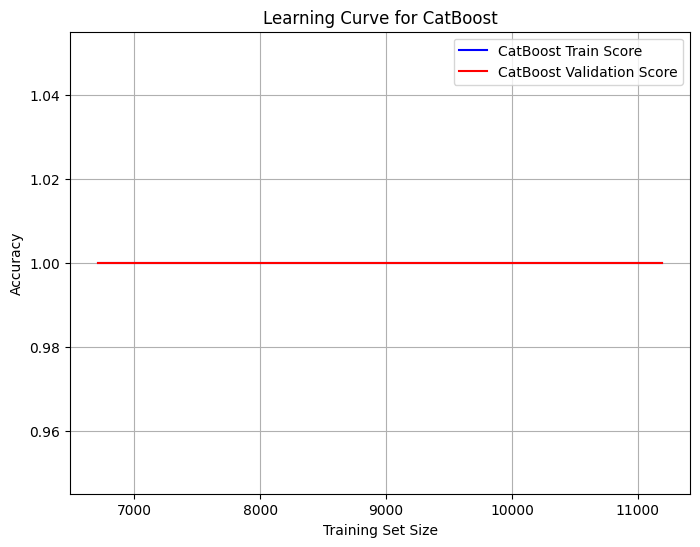


Training XGBoost...
5-Fold Cross-Validation Accuracy for XGBoost: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0000
Standard Deviation of CV Accuracy: 0.0000
Training Time: 0.6587 seconds


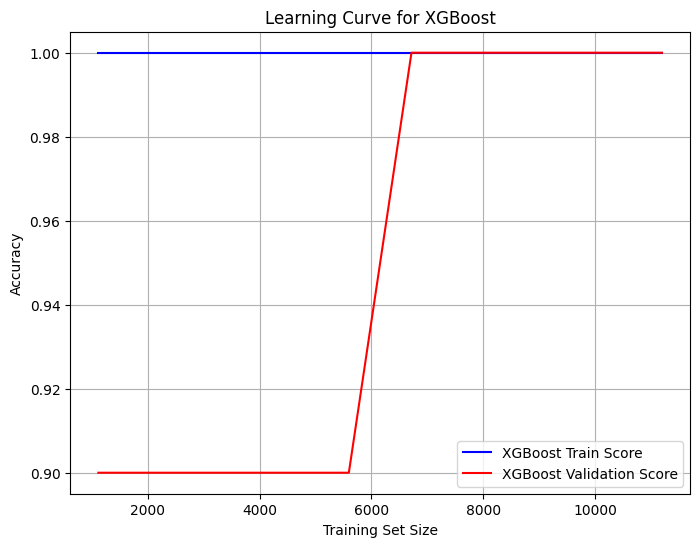

In [ ]:
import time
import numpy as np
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

features = significant_columns
X_balanced = train_df_balanced[features]
y_balanced = train_df_balanced['outcome']

# Define the classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,), max_iter=1000, alpha=0.001, solver='adam', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=10, early_stopping_rounds=50, random_state=42, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, alpha=0.01, gamma=0, random_state=42)
}

# Train classifiers and evaluate using 5-fold CV
for clf_name, clf in classifiers.items():
    print(f"\nTraining {clf_name}...")

    # Record the start time
    start_time = time.time()

    # Cross-validation (5 folds)
    cv_accuracy = cross_val_score(clf, X_balanced, y_balanced, cv=5, scoring='accuracy')

    # Record the end time and calculate the training time
    end_time = time.time()
    training_time = end_time - start_time

    # Display the cross-validation results
    print(f"5-Fold Cross-Validation Accuracy for {clf_name}: {cv_accuracy}")
    print(f"Mean CV Accuracy: {np.mean(cv_accuracy):.4f}")
    print(f"Standard Deviation of CV Accuracy: {np.std(cv_accuracy):.4f}")
    print(f"Training Time: {training_time:.4f} seconds")

    # Learning Curve (train sizes vs. accuracy)
    train_sizes, train_scores, valid_scores = learning_curve(clf, X_balanced, y_balanced, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Plot learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label=f'{clf_name} Train Score', color='b')
    plt.plot(train_sizes, np.mean(valid_scores, axis=1), label=f'{clf_name} Validation Score', color='r')
    plt.title(f"Learning Curve for {clf_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


Training Random Forest...

Random Forest Test Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      1751
         1.0     1.0000    1.0000    1.0000        31

    accuracy                         1.0000      1782
   macro avg     1.0000    1.0000    1.0000      1782
weighted avg     1.0000    1.0000    1.0000      1782


Random Forest Accuracy: 1.0000

Random Forest AUC Score: 1.0000
Random Forest - Average Precision (AP): 1.0000


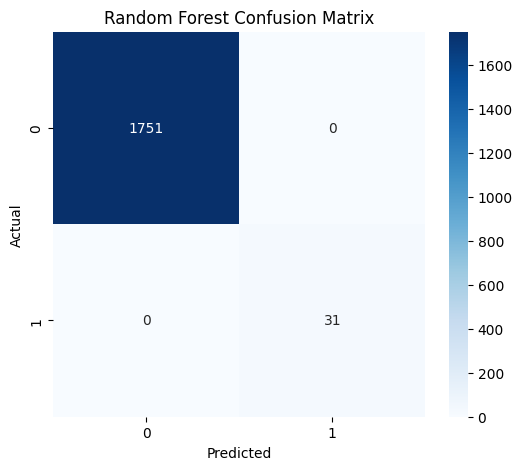

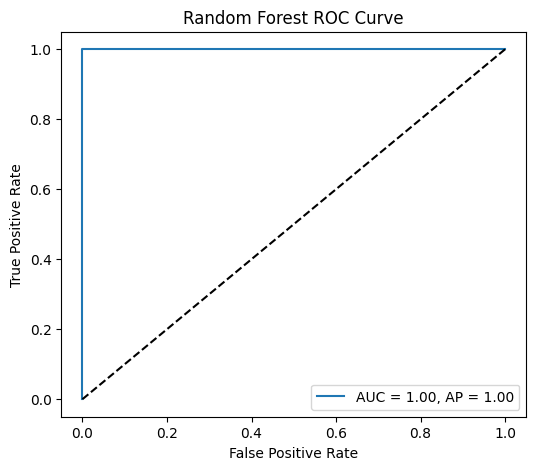

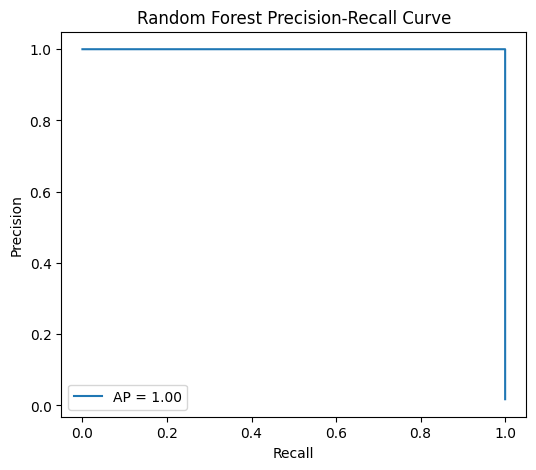


Training Decision Tree...

Decision Tree Test Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      1751
         1.0     1.0000    1.0000    1.0000        31

    accuracy                         1.0000      1782
   macro avg     1.0000    1.0000    1.0000      1782
weighted avg     1.0000    1.0000    1.0000      1782


Decision Tree Accuracy: 1.0000

Decision Tree AUC Score: 1.0000
Decision Tree - Average Precision (AP): 1.0000


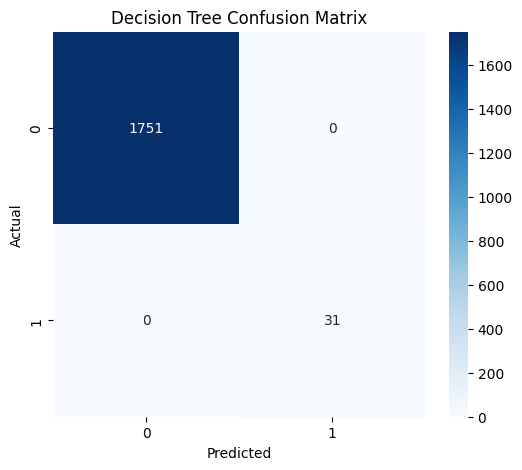

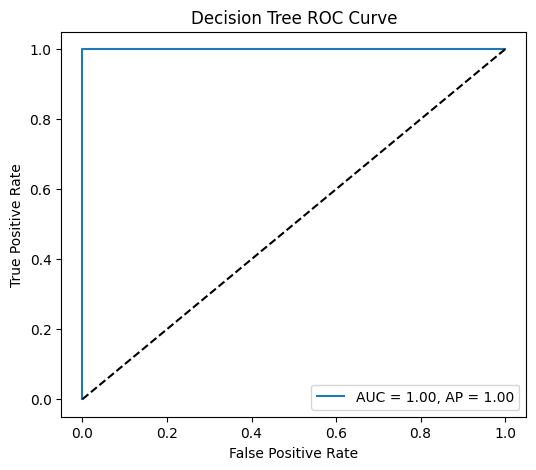

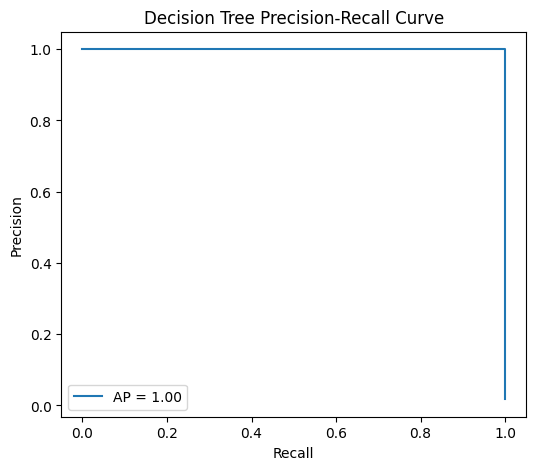


Training Extra Trees...

Extra Trees Test Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      1751
         1.0     1.0000    1.0000    1.0000        31

    accuracy                         1.0000      1782
   macro avg     1.0000    1.0000    1.0000      1782
weighted avg     1.0000    1.0000    1.0000      1782


Extra Trees Accuracy: 1.0000

Extra Trees AUC Score: 1.0000
Extra Trees - Average Precision (AP): 1.0000


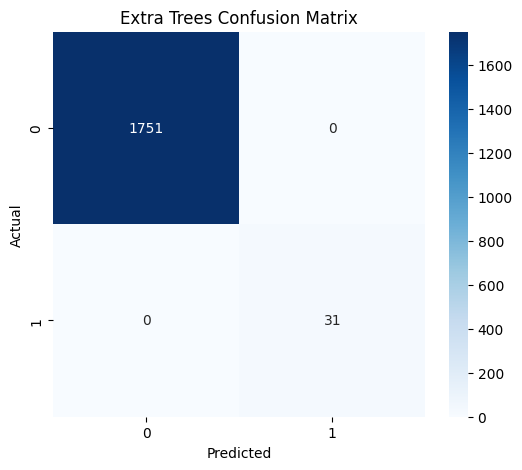

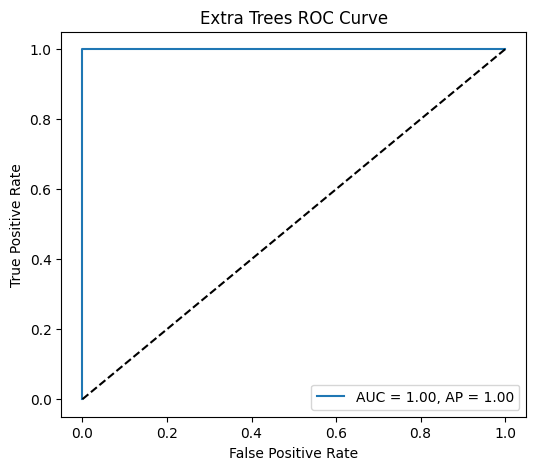

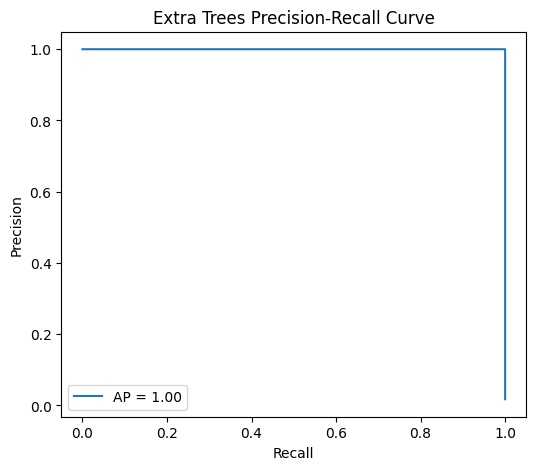


Training KNN...

KNN Test Classification Report:
              precision    recall  f1-score   support

         0.0     0.9907    0.9703    0.9804      1751
         1.0     0.2239    0.4839    0.3061        31

    accuracy                         0.9618      1782
   macro avg     0.6073    0.7271    0.6433      1782
weighted avg     0.9773    0.9618    0.9687      1782


KNN Accuracy: 0.9618

KNN AUC Score: 0.8101
KNN - Average Precision (AP): 0.2045


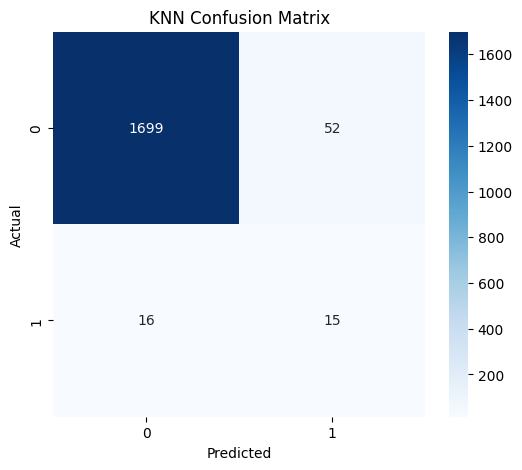

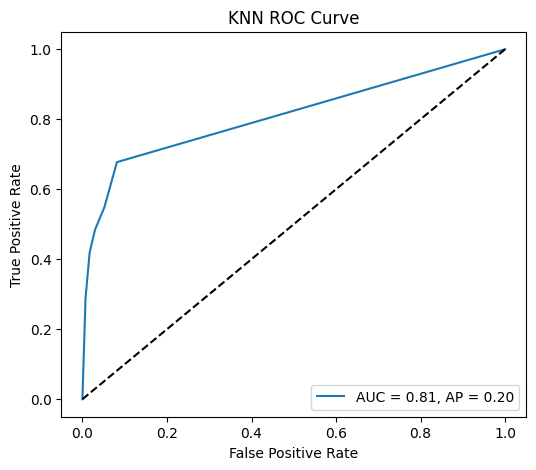

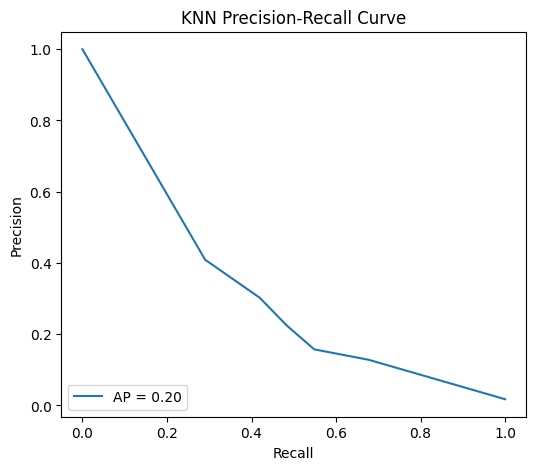


Training MLP...

MLP Test Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      1751
         1.0     1.0000    1.0000    1.0000        31

    accuracy                         1.0000      1782
   macro avg     1.0000    1.0000    1.0000      1782
weighted avg     1.0000    1.0000    1.0000      1782


MLP Accuracy: 1.0000

MLP AUC Score: 1.0000
MLP - Average Precision (AP): 1.0000


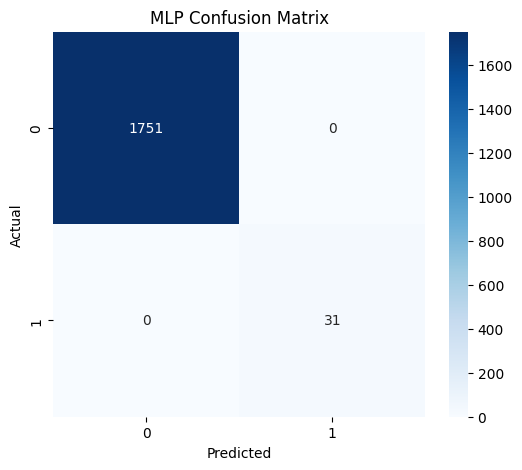

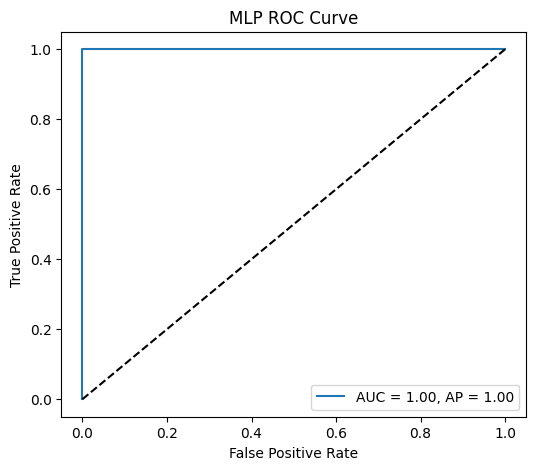

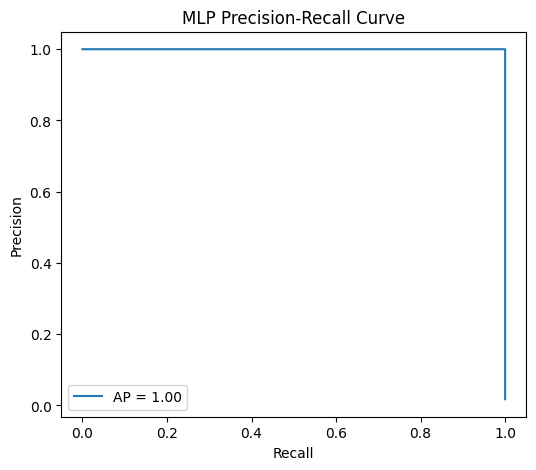


Training CatBoost...

CatBoost Test Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      1751
         1.0     1.0000    1.0000    1.0000        31

    accuracy                         1.0000      1782
   macro avg     1.0000    1.0000    1.0000      1782
weighted avg     1.0000    1.0000    1.0000      1782


CatBoost Accuracy: 1.0000

CatBoost AUC Score: 1.0000
CatBoost - Average Precision (AP): 1.0000


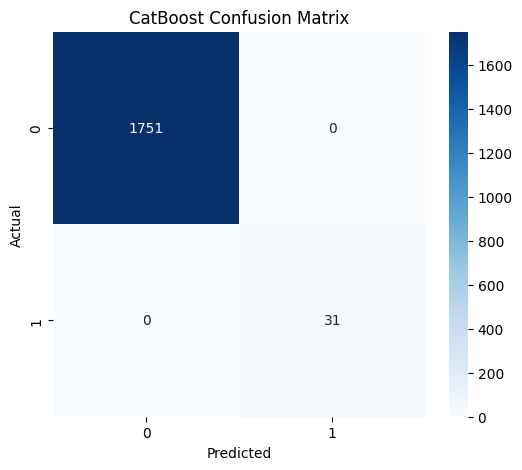

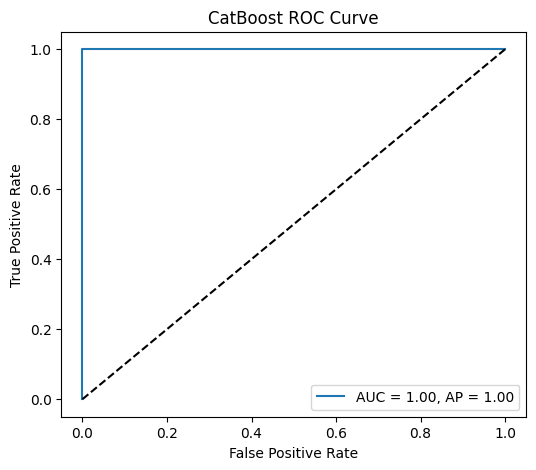

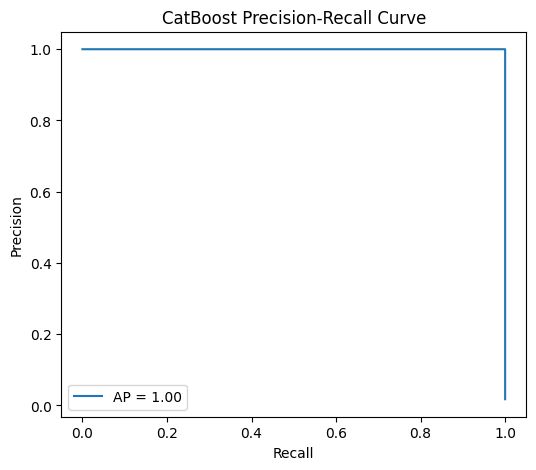


Training XGBoost...

XGBoost Test Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      1751
         1.0     1.0000    1.0000    1.0000        31

    accuracy                         1.0000      1782
   macro avg     1.0000    1.0000    1.0000      1782
weighted avg     1.0000    1.0000    1.0000      1782


XGBoost Accuracy: 1.0000

XGBoost AUC Score: 1.0000
XGBoost - Average Precision (AP): 1.0000


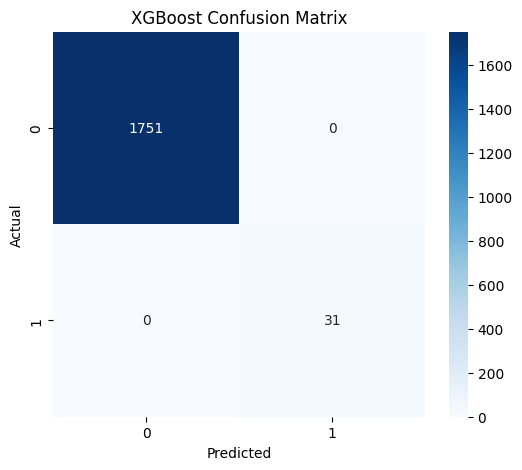

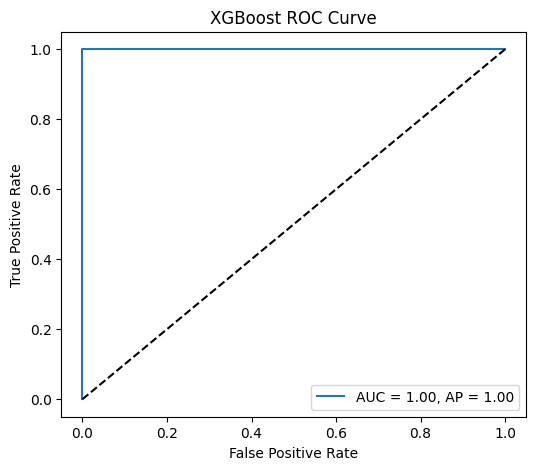

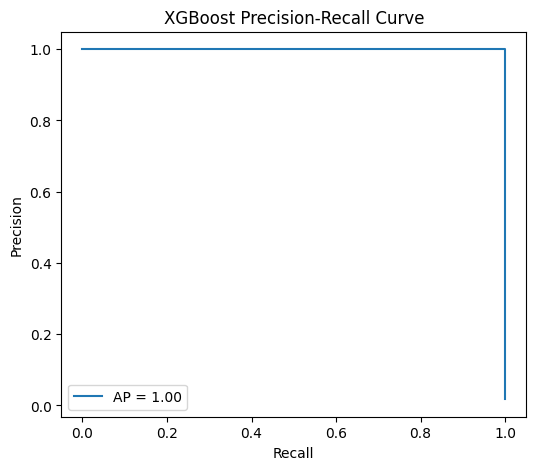

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score

features = significant_columns
X_test = test_df[features]
y_test = test_df['outcome']

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,), max_iter=1000, alpha=0.001, solver='adam', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=10, early_stopping_rounds=50, random_state=42, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, alpha=0.01, gamma=0, random_state=42)
}

for clf_name, clf in classifiers.items():
    print(f"\nTraining {clf_name}...")
    clf.fit(X_balanced, y_balanced)
    y_test_pred = clf.predict(X_test)

    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1]
    else:
        print(f"{clf_name} does not support probability prediction.")
        continue

    print(f"\n{clf_name} Test Classification Report:")
    print(classification_report(y_test, y_test_pred, digits=4))

    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"\n{clf_name} Accuracy: {accuracy:.4f}")

    try:
        auc_score = roc_auc_score(y_test, y_prob)
        print(f"\n{clf_name} AUC Score: {auc_score:.4f}")
    except Exception as e:
        print(f"\n{clf_name} AUC Error: {e}")

    try:
        ap_score = average_precision_score(y_test, y_prob)
        print(f"{clf_name} - Average Precision (AP): {ap_score:.4f}")
    except Exception as e:
        print(f"{clf_name} - AP Error: {e}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.title(f"{clf_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}, AP = {ap_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{clf_name} ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, label=f'AP = {ap_score:.2f}')
    plt.title(f"{clf_name} Precision-Recall Curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,), max_iter=1000, alpha=0.001, solver='adam', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=10, early_stopping_rounds=50, random_state=42, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, alpha=0.01, gamma=0, random_state=42)
}

lb = LabelBinarizer()
lb.fit(y_balanced)

for clf_name, clf in classifiers.items():
    print(f"\nTraining {clf_name}...")
    clf.fit(X_balanced, y_balanced)
    y_test_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)

    print(f"\n{clf_name} Confusion Matrix:")
    print(cm)

    print(f"\nFor {clf_name}:")
    for i in range(len(lb.classes_)):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        print(f"\nClass: {lb.classes_[i]}")
        print(f"True Negative (TN): {TN}")
        print(f"False Positive (FP): {FP}")
        print(f"False Negative (FN): {FN}")
        print(f"True Positive (TP): {TP}")
        print(f"Interpretation for {lb.classes_[i]}:")
        print(f"- True Positives (TP): {TP} instances of class {lb.classes_[i]} correctly predicted as {lb.classes_[i]}.")
        print(f"- False Positives (FP): {FP} instances of class {lb.classes_[i]} incorrectly predicted as {lb.classes_[i]}.")
        print(f"- False Negatives (FN): {FN} instances of class {lb.classes_[i]} incorrectly predicted as not {lb.classes_[i]}.")
        print(f"- True Negatives (TN): {TN} instances correctly predicted as not {lb.classes_[i]}.")

    print("\n" + "="*50)


Training Random Forest...

Random Forest Confusion Matrix:
[[1751    0]
 [   0   31]]

For Random Forest:

Class: 0.0
True Negative (TN): 31
False Positive (FP): 0
False Negative (FN): 0
True Positive (TP): 1751
Interpretation for 0.0:
- True Positives (TP): 1751 instances of class 0.0 correctly predicted as 0.0.
- False Positives (FP): 0 instances of class 0.0 incorrectly predicted as 0.0.
- False Negatives (FN): 0 instances of class 0.0 incorrectly predicted as not 0.0.
- True Negatives (TN): 31 instances correctly predicted as not 0.0.

Class: 1.0
True Negative (TN): 1751
False Positive (FP): 0
False Negative (FN): 0
True Positive (TP): 31
Interpretation for 1.0:
- True Positives (TP): 31 instances of class 1.0 correctly predicted as 1.0.
- False Positives (FP): 0 instances of class 1.0 incorrectly predicted as 1.0.
- False Negatives (FN): 0 instances of class 1.0 incorrectly predicted as not 1.0.
- True Negatives (TN): 1751 instances correctly predicted as not 1.0.


Training Deci

In [ ]:
import time
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report


classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,), max_iter=6000, alpha=0.001, solver='adam', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=10, early_stopping_rounds=50, random_state=42, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, alpha=0.01, gamma=0, random_state=42)
}


voting_clf = VotingClassifier(
    estimators=[('rf', classifiers['Random Forest']),
                ('dt', classifiers['Decision Tree']),
                ('et', classifiers['Extra Trees']),
                ('knn', classifiers['KNN']),
                ('mlp', classifiers['MLP']),
                ('catboost', classifiers['CatBoost']),
                ('xgboost', classifiers['XGBoost'])],
    voting='soft'
)


start_train_time = time.time()


voting_clf.fit(X_balanced, y_balanced)

end_train_time = time.time()
train_time = end_train_time - start_train_time


y_train_pred_voting = voting_clf.predict(X_balanced)


start_test_time = time.time()


y_test_pred_voting = voting_clf.predict(X_test)


end_test_time = time.time()
test_time = end_test_time - start_test_time


print("\nVoting Classifier Training Classification Report:")
print(classification_report(y_balanced, y_train_pred_voting, digits=4))
print(f"Training Time: {train_time:.4f} seconds")

print("\nVoting Classifier Test Classification Report:")
print(classification_report(y_test, y_test_pred_voting, digits=4))
print(f"Testing Time: {test_time:.4f} seconds")


Voting Classifier Training Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      6995
         1.0     1.0000    1.0000    1.0000      6995

    accuracy                         1.0000     13990
   macro avg     1.0000    1.0000    1.0000     13990
weighted avg     1.0000    1.0000    1.0000     13990

Training Time: 9.6217 seconds

Voting Classifier Test Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      1751
         1.0     1.0000    1.0000    1.0000        31

    accuracy                         1.0000      1782
   macro avg     1.0000    1.0000    1.0000      1782
weighted avg     1.0000    1.0000    1.0000      1782

Testing Time: 0.4093 seconds


In [ ]:
import time
import psutil
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

X_test = test_df[features]
y_test = test_df['outcome']
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,), max_iter=6000, alpha=0.001, solver='adam', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=10, early_stopping_rounds=50, random_state=42, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, alpha=0.01, gamma=0, random_state=42)
}


voting_clf = VotingClassifier(
    estimators=[('rf', classifiers['Random Forest']),
                ('dt', classifiers['Decision Tree']),
                ('et', classifiers['Extra Trees']),
                ('knn', classifiers['KNN']),
                ('mlp', classifiers['MLP']),
                ('catboost', classifiers['CatBoost']),
                ('xgboost', classifiers['XGBoost'])],
    voting='soft'
)


def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / (1024 * 1024)


mem_before = get_memory_usage()


start_train_time = time.time()
voting_clf.fit(X_balanced, y_balanced)
end_train_time = time.time()
train_time = end_train_time - start_train_time


mem_after = get_memory_usage()


start_infer_train_time = time.time()
y_train_pred_voting = voting_clf.predict(X_balanced)
end_infer_train_time = time.time()
infer_train_time = end_infer_train_time - start_infer_train_time

start_infer_test_time = time.time()
y_test_pred_voting = voting_clf.predict(X_test)
end_infer_test_time = time.time()
infer_test_time = end_infer_test_time - start_infer_test_time


print(f"Memory Usage During Training: {mem_after - mem_before:.4f} MB")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Inference Time (Train): {infer_train_time:.4f} seconds")
print(f"Inference Time (Test): {infer_test_time:.4f} seconds")


print("\nVoting Classifier Training Classification Report:")
print(classification_report(y_balanced, y_train_pred_voting, digits=4))

print("\nVoting Classifier Test Classification Report:")
print(classification_report(y_test, y_test_pred_voting, digits=4))


Memory Usage During Training: 0.4062 MB
Training Time: 9.7221 seconds
Inference Time (Train): 1.5621 seconds
Inference Time (Test): 0.3983 seconds

Voting Classifier Training Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      6995
         1.0     1.0000    1.0000    1.0000      6995

    accuracy                         1.0000     13990
   macro avg     1.0000    1.0000    1.0000     13990
weighted avg     1.0000    1.0000    1.0000     13990


Voting Classifier Test Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      1751
         1.0     1.0000    1.0000    1.0000        31

    accuracy                         1.0000      1782
   macro avg     1.0000    1.0000    1.0000      1782
weighted avg     1.0000    1.0000    1.0000      1782



In [ ]:
pip install memory-profiler

5-Fold Cross Validation Accuracy: 1.0000 ± 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  

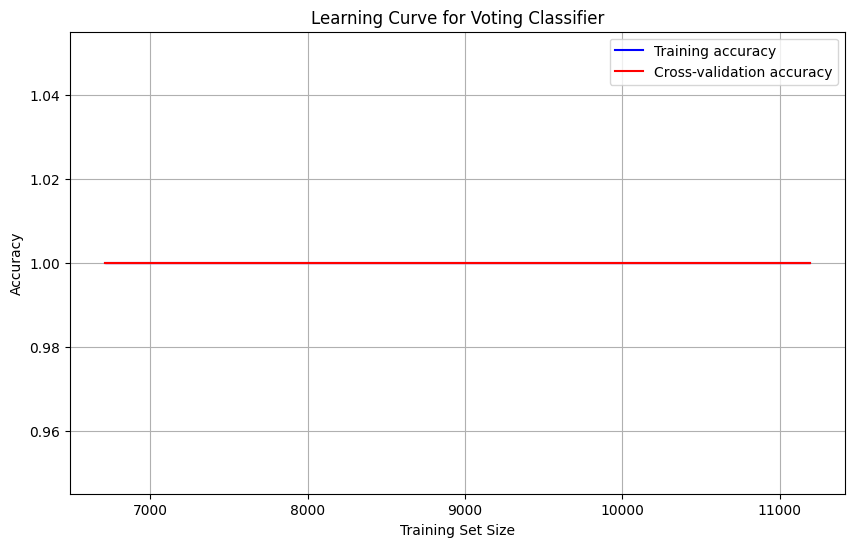

Learning Curve Calculation Time: 323.4176 seconds


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, learning_curve


voting_clf = VotingClassifier(
    estimators=[('rf', classifiers['Random Forest']),
                ('dt', classifiers['Decision Tree']),
                ('et', classifiers['Extra Trees']),
                ('knn', classifiers['KNN']),
                ('mlp', classifiers['MLP']),
                ('catboost', classifiers['CatBoost']),
                ('xgboost', classifiers['XGBoost'])],
    voting='soft'
)

cv_scores = cross_val_score(voting_clf, X_balanced, y_balanced, cv=5, scoring='accuracy')


cv_accuracy_mean = np.mean(cv_scores)
cv_accuracy_std = np.std(cv_scores)

print(f"5-Fold Cross Validation Accuracy: {cv_accuracy_mean:.4f} ± {cv_accuracy_std:.4f}")


start_train_time = time.time()

train_sizes, train_scores, test_scores = learning_curve(
    voting_clf, X_balanced, y_balanced, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

end_train_time = time.time()
learning_curve_time = end_train_time - start_train_time

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation accuracy', color='red')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='red', alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Voting Classifier')
plt.legend(loc='best')
plt.grid(True)
plt.show()


print(f"Learning Curve Calculation Time: {learning_curve_time:.4f} seconds")


In [ ]:
from sklearn.metrics import cohen_kappa_score

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,), max_iter=6000, alpha=0.001, solver='adam', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=10, early_stopping_rounds=50, random_state=42, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, alpha=0.01, gamma=0, random_state=42)
}


kappa_scores = {}

for clf_name, clf in classifiers.items():
    print(f"\nTraining {clf_name}...")

    clf.fit(X_balanced, y_balanced)


    y_test_pred = clf.predict(X_test)


    kappa = cohen_kappa_score(y_test, y_test_pred)
    kappa_scores[clf_name] = kappa


    print(f"Cohen's Kappa Score for {clf_name}: {kappa:.4f}")


print("\nCohen's Kappa Scores for All Classifiers:")
for clf_name, kappa in kappa_scores.items():
    print(f"{clf_name}: {kappa:.4f}")



Training Random Forest...
Cohen's Kappa Score for Random Forest: 1.0000

Training Decision Tree...
Cohen's Kappa Score for Decision Tree: 1.0000

Training Extra Trees...
Cohen's Kappa Score for Extra Trees: 1.0000

Training KNN...
Cohen's Kappa Score for KNN: 0.2892

Training MLP...
Cohen's Kappa Score for MLP: 1.0000

Training CatBoost...
Cohen's Kappa Score for CatBoost: 1.0000

Training XGBoost...
Cohen's Kappa Score for XGBoost: 1.0000

Cohen's Kappa Scores for All Classifiers:
Random Forest: 1.0000
Decision Tree: 1.0000
Extra Trees: 1.0000
KNN: 0.2892
MLP: 1.0000
CatBoost: 1.0000
XGBoost: 1.0000


In [ ]:
from sklearn.metrics import cohen_kappa_score

start_train_time = time.time()


voting_clf.fit(X_balanced, y_balanced)


end_train_time = time.time()
train_time = end_train_time - start_train_time


y_train_pred_voting = voting_clf.predict(X_balanced)


start_test_time = time.time()


y_test_pred_voting = voting_clf.predict(X_test)

end_test_time = time.time()
test_time = end_test_time - start_test_time



kappa_voting = cohen_kappa_score(y_test, y_test_pred_voting)
print(f"\nCohen's Kappa Score for Voting Classifier on Test Data: {kappa_voting:.4f}")


Cohen's Kappa Score for Voting Classifier on Test Data: 1.0000


#SHAP SHapley Additive exPlanations

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5


In [ ]:
import numpy as np
classes = np.unique(y_resampled)
print("Classes in the target variable:", classes)

Classes in the target variable: [0. 1.]


In [ ]:
import shap
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_resampled, y_resampled)


shap.initjs()


explainer_xgb = shap.TreeExplainer(xgb_model)


shap_values_xgb = explainer_xgb.shap_values(X_resampled)


shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0], X_resampled.iloc[0, :])

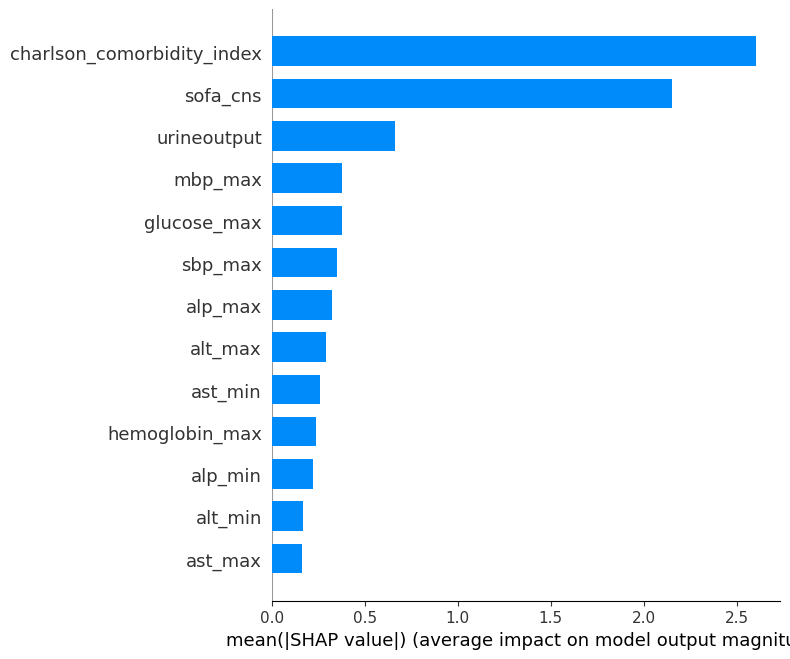

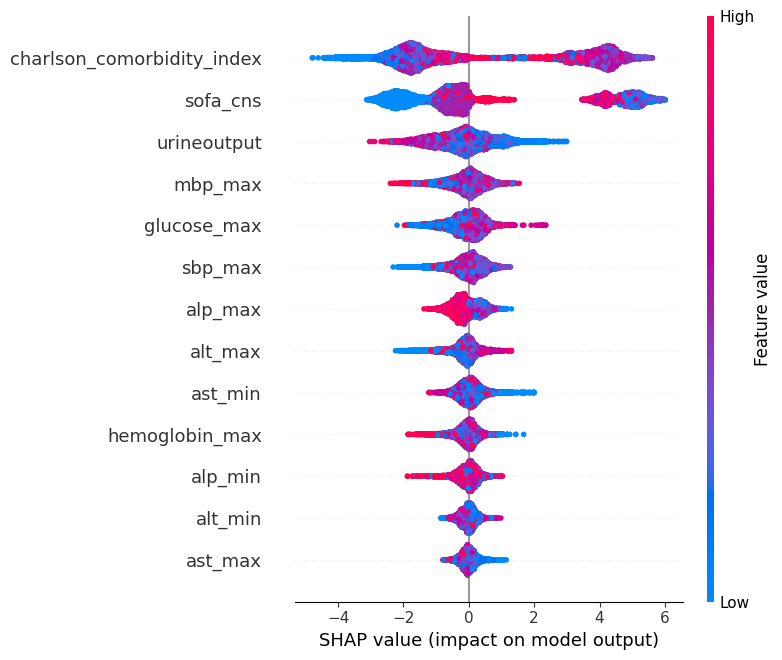

In [ ]:
shap.summary_plot(shap_values_xgb, X_resampled, plot_type="bar")
shap.summary_plot(shap_values_xgb, X_resampled)

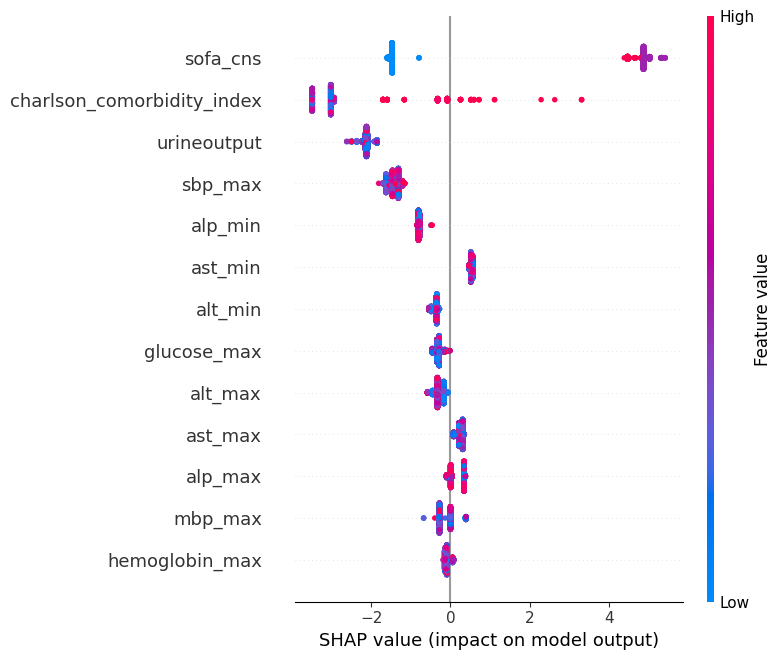

In [ ]:
X_test_subset = X_test[X_resampled.columns]
shap_values_test = explainer_xgb.shap_values(X_test_subset)
shap.summary_plot(shap_values_test, X_test_subset)

#Lime
Terget Column : outcome

True (1) → Patient survived

False (0) → Patient died

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=278dc3b7921a304317b7f3d5760fa15f9131dcf4e750d64daa48a93c9dc1030c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from lime import lime_tabular
import numpy as np


explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_test[X_resampled.columns]),
    feature_names=X_resampled.columns.tolist(),
    class_names=["patient won't survive", 'patient will survive.'],
    mode='classification'
)


i = 0
instance = X_test[X_resampled.columns].iloc[i]


exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=xgb_model.predict_proba
)


exp.show_in_notebook(show_table=True, show_all=False)

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [ ]:
from lime import lime_tabular
import numpy as np


explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_test[X_resampled.columns]),
    feature_names=X_resampled.columns.tolist(),
    class_names=["patient won't survive", 'patient will survive.'],
    mode='classification'
)


i = 10
instance = X_test[X_resampled.columns].iloc[i]


exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=xgb_model.predict_proba
)


exp.show_in_notebook(show_table=True, show_all=False)

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [ ]:
from lime import lime_tabular
import numpy as np


explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_test[X_resampled.columns]),
    feature_names=X_resampled.columns.tolist(),
    class_names=["patient won't survive", 'patient will survive.'],
    mode='classification'
)


i = 15
instance = X_test[X_resampled.columns].iloc[i]


exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=xgb_model.predict_proba
)


exp.show_in_notebook(show_table=True, show_all=False)


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.